In [802]:
%matplotlib widget

import numpy as np
import math
import matplotlib.pyplot as plt 
import astropy.units as u 
import astropy.constants as c 

In [803]:
grav_const = 6.67e-11
sol_mass = u.Msun * 1
AU_to_m = u.AU * 1
kms_to_ms = u.km/u.s * 1

In [804]:



class Body():
    def __init__(self, name, x_vec, v_vec, mass):
        
        self.name = name
        self.x_vec = x_vec
        self.v_vec = v_vec
        self.mass = mass
        
        
    def update_state(self, new_x, new_v):
        #print(self.x_vec, self.v_vec)
        self.x_vec = new_x
        self.v_vec = new_v
        
    def calc_accel(self, other):
        sep = self.x_vec - other.x_vec
        #print(sep)
        sep_mag = np.linalg.norm(sep)
        print(sep_mag, sep)
        accel = ((grav_const * other.mass) / (sep_mag ** 3)) * sep
        #print(accel)
        #print(accel)
        
        return(accel)
    
    
    def rk4(self, a_vec, dt):

        k1_v = a_vec * self.x_vec
        k1_x = self.v_vec
       # print(k1_x)
        
        k2_v = a_vec * (self.x_vec + k1_x * (dt/2))
        k2_x = self.v_vec * k1_v * (dt/2)
        
        k3_v = a_vec * (self.x_vec + k2_x * (dt
        
        k4_v = a_vec * (self.x_vec + k3_x * dt)
        k4_x = self.v_vec * k3_v * dt
        
        new_v = self.v_vec + (dt/6) * (k1_v + (2 * k2_v) + (2 * k3_v) + k4_v)
        new_x = self.x_vec + (dt/6) * (k1_x + (2 * k2_x) + (2 * k3_x) + k4_x)
        #print(new_v)
        #print(new_x, new_v)
        return(new_x, new_v)

    

In [805]:
SecondsPerStep = 0.0005

dt = 1

time_sequence = 0

step_max = 1000
print(dt)

1


In [806]:
historical_plotter = np.zeros((2, step_max,3))


In [807]:
def Simulate(bodies, step_max, dt):
    t = 0
    step = 0
    while step < step_max:
        a_vec = Body.calc_accel(bodies[0], bodies[1])
        #print(a_vec)    
        new_x, new_v = Body.rk4(bodies[0], a_vec, dt)
        #print(new_x)
        Body.update_state(bodies[0], new_x, new_v)
        historical_plotter[0][step] = new_x
        step += 1
                   

def Simulate(bodies, step_max, dt):
    t = 0
    step = 0
    while step < step_max:
        for i in range(len(bodies)):
            for j in range(len(bodies)):
                if j != i:
                    a_vec = Body.calc_accel(bodies[i], bodies[j])
                    #print(a_vec)
                    #print(a_vec)
                    
                    new_x, new_v = Body.rk4(bodies[i], a_vec, dt)
                    
                    Body.update_state(bodies[i], new_x, new_v)
                    historical_plotter[i][step] = new_x
        step += 1
                   

In [808]:
Earth = Body("Earth", np.array([0,1,0]) * AU_to_m.cgs.value, np.array([0,30,33]) * kms_to_ms.cgs.value, 333333)
Sun = Body("Sun", np.array([0,0,0])* AU_to_m.cgs.value, np.array([0, 0, 0]), sol_mass.cgs.value)

bodies = [Earth, Sun]
Body.calc_accel(Earth, Sun)


Simulate(bodies, 5, 1)

14959787070000.0 [0.00000000e+00 1.49597871e+13 0.00000000e+00]
14959787070000.0 [0.00000000e+00 1.49597871e+13 0.00000000e+00]
1.9835505297324562e+18 [0.00000000e+00 1.98355053e+18 5.50000000e+05]
2.0723244702045745e+18 [0.00000000e+00 2.07232447e+18 1.10000000e+06]
2.1572431849008888e+18 [0.00000000e+00 2.15724318e+18 1.65000000e+06]
2.2387767178346793e+18 [0.00000000e+00 2.23877672e+18 2.20000000e+06]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


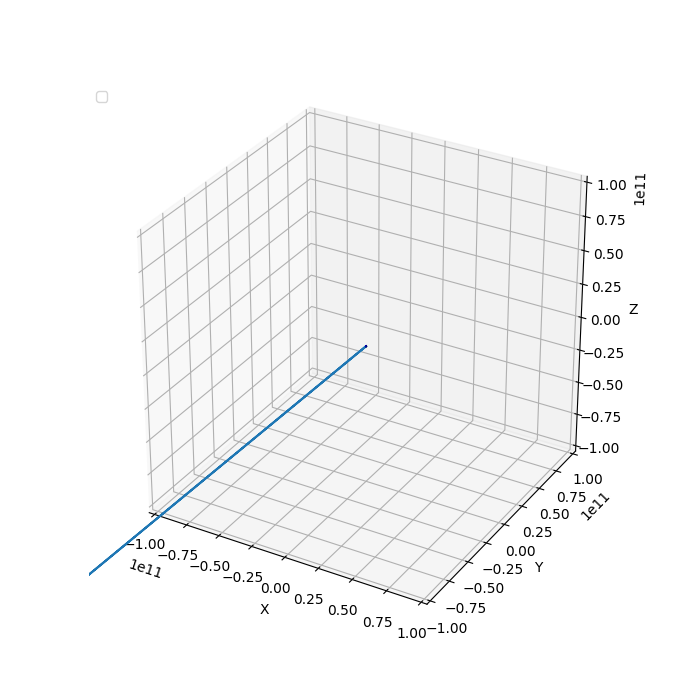

In [809]:

# Graphing section
fig = plt.figure(figsize = (7,7))

ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,1])

graphcounter = 0

# This just names the orbital paths from the CSV
ax.plot3D(historical_plotter[0][0], historical_plotter[0][1], historical_plotter[0][2])

leg = plt.legend(loc='upper left')

    
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

ax.set_xlabel('X')

ax.set_ylabel('Y')

ax.set_zlabel('Z')


x = 696340000 * np.outer(np.cos(u), np.sin(v))
y = 696340000 * np.outer(np.sin(u), np.sin(v))
z = 696340000 * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z, rstride=4, cstride=4, color='b')

# The area that the graph will show upon start
GraphAreaStart = 100000000000

ax.set_xlim3d(-1 * GraphAreaStart, GraphAreaStart)
ax.set_ylim3d(-1 * GraphAreaStart, GraphAreaStart)
ax.set_zlim3d(-1 * GraphAreaStart, GraphAreaStart)

plt.show()